In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
stores_train = pd.read_csv('data/stores_train.csv')
stores_test = pd.read_csv('data/stores_test.csv')

In [4]:
grunnkrets_ages = pd.read_csv('data/grunnkrets_age_distribution.csv')
#grunnkrets = pd.read_csv('data/grunnkrets_norway_stripped.csv')
grunnkrets_household_types = pd.read_csv('data/grunnkrets_households_num_persons.csv')
grunnkrets_household_income = pd.read_csv('data/grunnkrets_income_households.csv')
stores_train_with_income = stores_train.merge(grunnkrets_household_income, how='left', on='grunnkrets_id')
stores_train_with_income.head()

,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,year_y,all_households,singles,couple_without_children,couple_with_children,other_households,single_parent_with_children
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,2016.0,398700.0,277500.0,669100.0,832800.0,679600.0,349500.0
1,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,2015.0,394000.0,273400.0,658400.0,787300.0,637200.0,373900.0
2,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,2015.0,371200.0,290000.0,637200.0,782800.0,595000.0,317700.0
3,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,2016.0,374800.0,295000.0,679600.0,802200.0,604100.0,397700.0
4,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,2016.0,347900.0,251900.0,589900.0,673100.0,637600.0,327000.0


In [5]:
print('Number of Training Examples = {}'.format(stores_train.shape[0]))
print('Number of Test Examples = {}\n'.format(stores_test.shape[0]))
print('Training X Shape = {}'.format(stores_train.shape))
print('Training y Shape = {}\n'.format(stores_train['revenue'].shape[0]))
print('Test X Shape = {}'.format(stores_test.shape))
print('Test y Shape = {}\n'.format(stores_test.shape[0]))
print('Train columns \n', list(stores_train.columns))
print('Test columns \n', list(stores_test.columns))

Number of Training Examples = 12859
Number of Test Examples = 8577

Training X Shape = (12859, 12)
Training y Shape = 12859

Test X Shape = (8577, 11)
Test y Shape = 8577

Train columns 
 ['store_id', 'year', 'store_name', 'plaace_hierarchy_id', 'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon', 'chain_name', 'mall_name', 'revenue']
Test columns 
 ['store_id', 'year', 'store_name', 'plaace_hierarchy_id', 'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon', 'chain_name', 'mall_name']


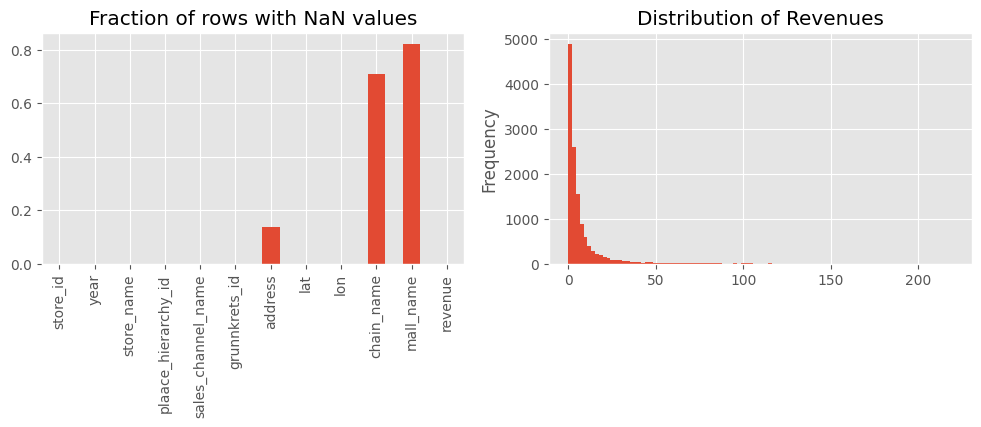

In [6]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
stores_train.isna().mean().plot.bar(ax=ax1)
ax1.set_title('Fraction of rows with NaN values')
stores_train.revenue.plot.hist(bins=100, ax=ax2)
ax2.set_title('Distribution of Revenues');

In [7]:
print("Maximum revenue: ", stores_train['revenue'].max())
print("Average revenue: ", round(stores_train['revenue'].mean(), 2))
print("Minimum revenue: ", stores_train['revenue'].min())
stores_train.loc[stores_train['revenue'] >= 100 , ('store_name', 'grunnkrets_id', 'sales_channel_name')]


Maximum revenue:  219.599
Average revenue:  8.22
Minimum revenue:  0.0


,store_name,grunnkrets_id,sales_channel_name
3388,STUDIO SIGDAL BERGEN,12010309,Kitchen design stores
3405,HTH KJØKKEN TRONDHEIM,16011614,Kitchen design stores
3618,BLÅ BOLIG AS,18120106,Construction stores
4124,HAALAND ELKJØP STORMARKED,18330203,Electronics stores
4667,JOLLYROOM,7061101,Children’s clothing and equipment stores
...,...,...,...
8105,REMA 1000 SANDVED,11020406,Grocery stores
8108,REMA 1000 BYGNES,11490701,Grocery stores
8120,REMA 1000 WERGELAND,12010315,Grocery stores
8128,EUROSPAR AMFI MOA,15040704,Grocery stores


In [8]:
#sales_channel_name
#maybe mall_name is important -> encode

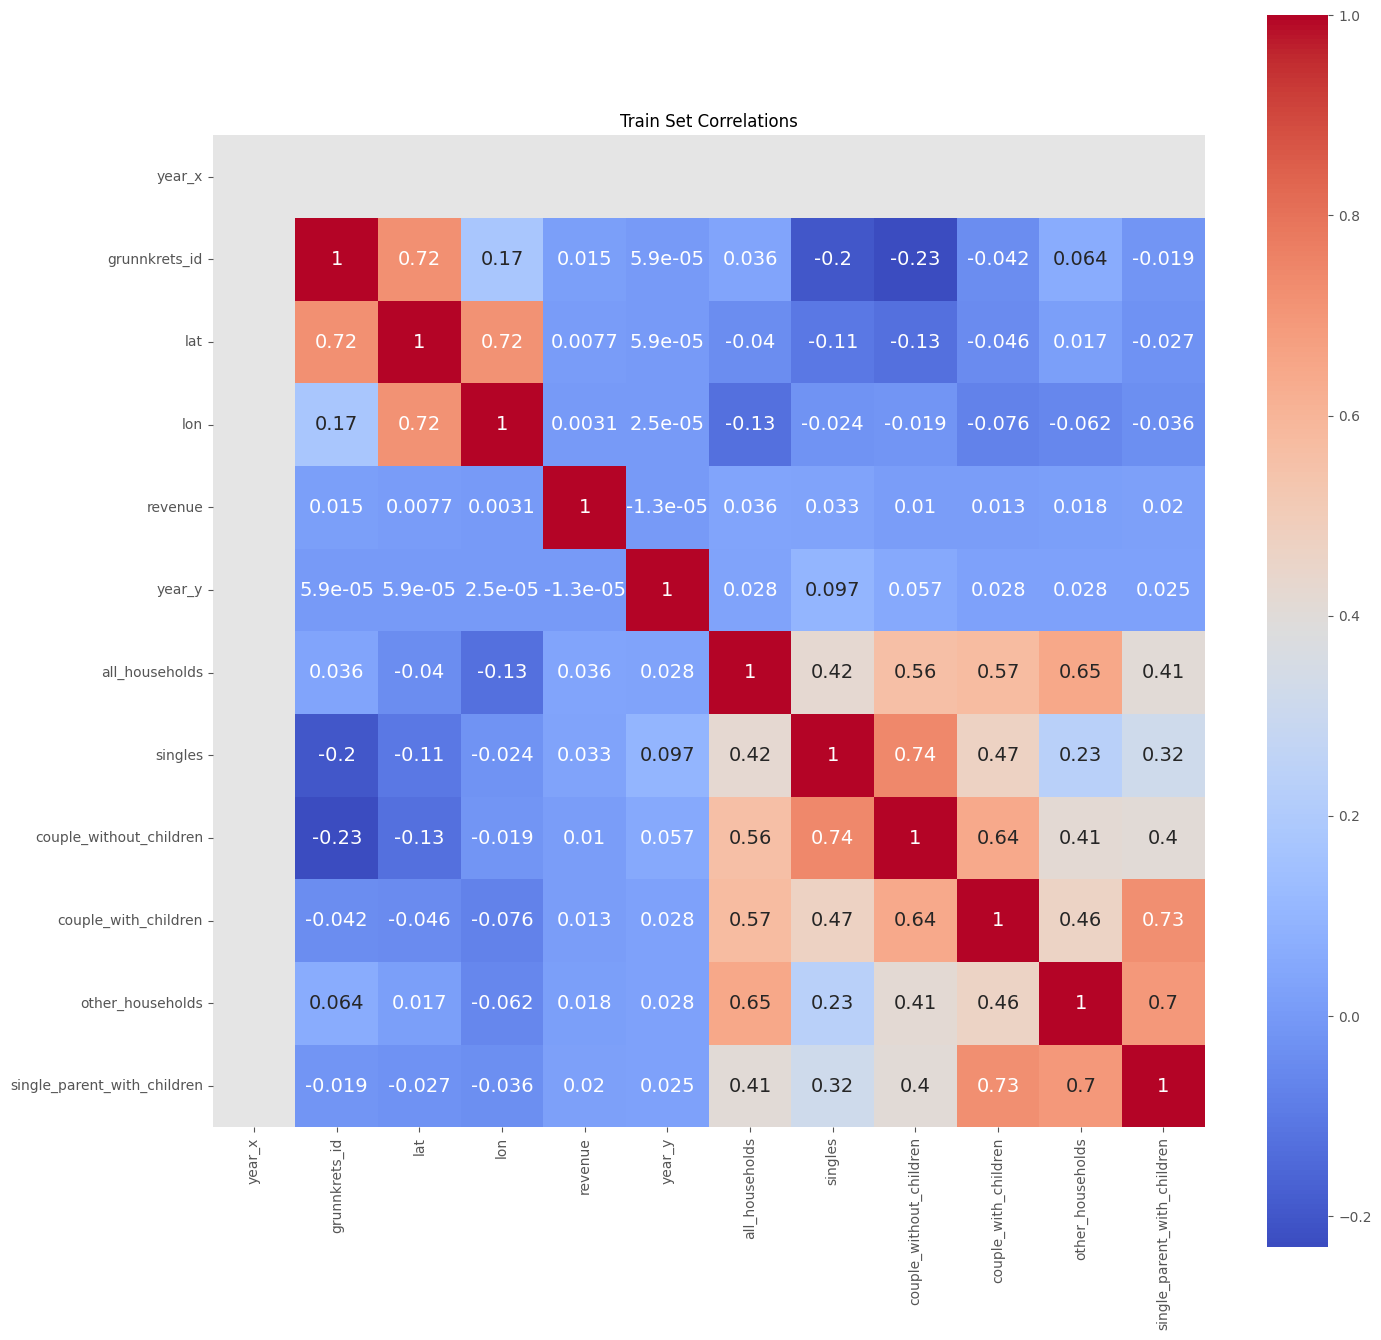

In [9]:
fig, axs = plt.subplots(figsize=(16, 16))

sns.heatmap(stores_train_with_income.corr(), ax=axs, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
#sns.heatmap(stores_test.corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
    
axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=10)
    
axs.set_title('Train Set Correlations', size=12)
#axs[1].set_title('Test Set Correlations', size=12)

plt.show()

In [10]:
stores_train.info()
stores_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12859 entries, 0 to 12858
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             12859 non-null  object 
 1   year                 12859 non-null  int64  
 2   store_name           12859 non-null  object 
 3   plaace_hierarchy_id  12859 non-null  object 
 4   sales_channel_name   12859 non-null  object 
 5   grunnkrets_id        12859 non-null  int64  
 6   address              11085 non-null  object 
 7   lat                  12859 non-null  float64
 8   lon                  12859 non-null  float64
 9   chain_name           3737 non-null   object 
 10  mall_name            2280 non-null   object 
 11  revenue              12859 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 11 columns):
 #   Column           